# Training Loss Visualization
Graphs training and validation loss across all training phases.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Single-step training (10 completed epochs)
part1_train = [0.077563, 0.015575, 0.012991, 0.012291, 0.009987, 0.009689, 0.008179, 0.008855, 0.007751, 0.006977]
part1_val = [0.024982, 0.031108, 0.016129, 0.055106, 0.007181, 0.007695, 0.014638, 0.006585, 0.002592, 0.013307]

# Part 2: 2nd pass single-step (21 completed epochs)
part2_train = [0.013951, 0.012076, 0.011784, 0.012720, 0.011105, 0.013122, 0.012111, 0.010884, 0.011423, 0.010731,
               0.010824, 0.010880, 0.010381, 0.010189, 0.010915, 0.010212, 0.010279, 0.011220, 0.009214, 0.010642, 0.009729]
part2_val = [0.015558, 0.006382, 0.016323, 0.005459, 0.004657, 0.011104, 0.005791, 0.008918, 0.020121, 0.010975,
             0.023320, 0.004255, 0.020413, 0.005656, 0.005976, 0.005919, 0.005275, 0.005329, 0.006872, 0.008771, 0.026690]

# Part 3: Single-step (19 completed epochs)
part3_train = [0.002294, 0.001108, 0.000967, 0.000961, 0.000960, 0.000949, 0.001089, 0.000988, 0.000904, 0.000775,
               0.000964, 0.000829, 0.000837, 0.000772, 0.000918, 0.000818, 0.000810, 0.000817, 0.000753]
part3_val = [0.001377, 0.001323, 0.001075, 0.001015, 0.001456, 0.001462, 0.002704, 0.001818, 0.001101, 0.001104,
             0.000829, 0.000923, 0.000774, 0.001032, 0.001133, 0.001084, 0.000976, 0.000909, 0.001004]

# Part 4: Autoregressive training rollout=5 (30 completed epochs)
part4_train = [0.004197, 0.003299, 0.002960, 0.002840, 0.002714, 0.002642, 0.002523, 0.002519, 0.002435, 0.002384,
               0.002274, 0.002281, 0.002209, 0.002220, 0.002149, 0.002165, 0.002102, 0.002041, 0.002011, 0.002068,
               0.001986, 0.001983, 0.001937, 0.001945, 0.001971, 0.001877, 0.001943, 0.001829, 0.001804, 0.001855]
part4_val = [0.002618, 0.002513, 0.003214, 0.002273, 0.002185, 0.002490, 0.002077, 0.002474, 0.002499, 0.002047,
             0.002408, 0.002032, 0.002253, 0.001938, 0.001708, 0.001882, 0.001980, 0.001903, 0.001706, 0.002355,
             0.001776, 0.001768, 0.001985, 0.001921, 0.001851, 0.002167, 0.001975, 0.001742, 0.001570, 0.001616]

In [2]:
# Combine all data
all_train = part1_train + part2_train + part3_train + part4_train
all_val = part1_val + part2_val + part3_val + part4_val
epochs = list(range(1, len(all_train) + 1))

# Phase boundaries
phase1_end = len(part1_train)
phase2_end = phase1_end + len(part2_train)
phase3_end = phase2_end + len(part3_train)

print(f"Total epochs: {len(all_train)}")
print(f"Phase 1 (Single-step): Epochs 1-{phase1_end}")
print(f"Phase 2 (2nd pass): Epochs {phase1_end+1}-{phase2_end}")
print(f"Phase 3 (Single-step): Epochs {phase2_end+1}-{phase3_end}")
print(f"Phase 4 (Autoregressive): Epochs {phase3_end+1}-{len(all_train)}")

Total epochs: 80
Phase 1 (Single-step): Epochs 1-10
Phase 2 (2nd pass): Epochs 11-31
Phase 3 (Single-step): Epochs 32-50
Phase 4 (Autoregressive): Epochs 51-80


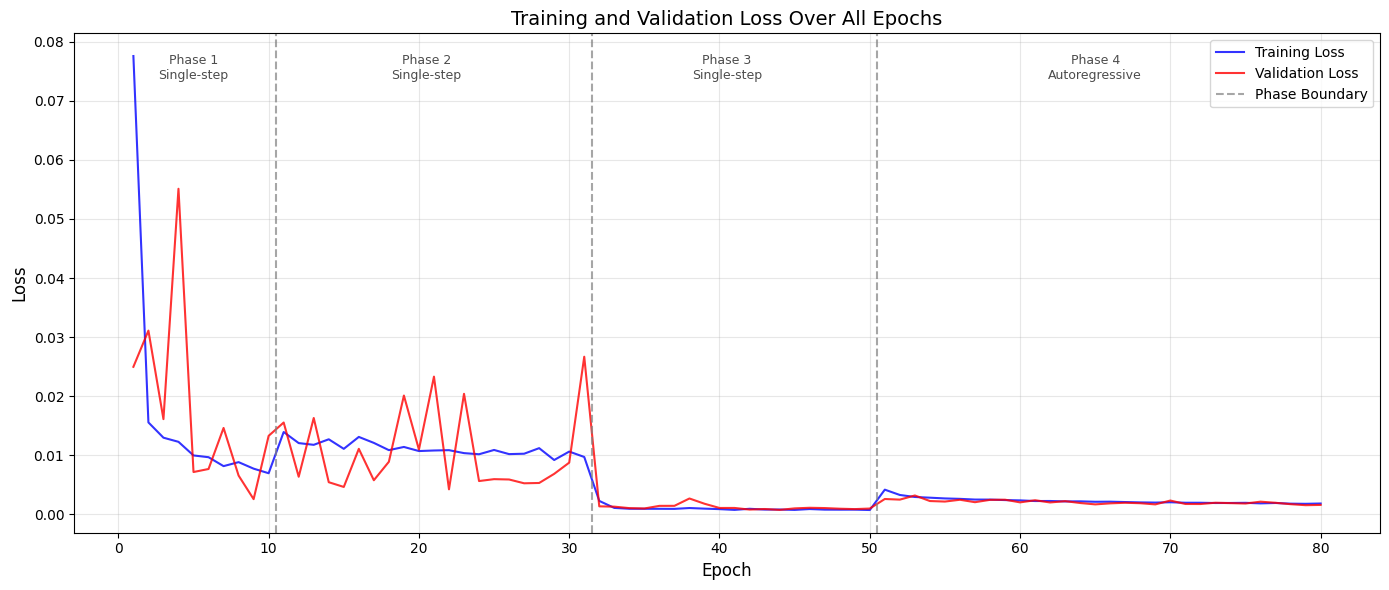

In [4]:
# Plot: Combined Training and Validation Loss
plt.figure(figsize=(14, 6))

plt.plot(epochs, all_train, 'b-', label='Training Loss', linewidth=1.5, alpha=0.8)
plt.plot(epochs, all_val, 'r-', label='Validation Loss', linewidth=1.5, alpha=0.8)

# Add vertical lines for phase boundaries
plt.axvline(x=phase1_end + 0.5, color='gray', linestyle='--', alpha=0.7, label='Phase Boundary')
plt.axvline(x=phase2_end + 0.5, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=phase3_end + 0.5, color='gray', linestyle='--', alpha=0.7)

# Add phase labels
plt.text(phase1_end/2, max(all_train)*0.95, 'Phase 1\nSingle-step', ha='center', fontsize=9, alpha=0.7)
plt.text(phase1_end + len(part2_train)/2, max(all_train)*0.95, 'Phase 2\nSingle-step', ha='center', fontsize=9, alpha=0.7)
plt.text(phase2_end + len(part3_train)/2, max(all_train)*0.95, 'Phase 3\nSingle-step', ha='center', fontsize=9, alpha=0.7)
plt.text(phase3_end + len(part4_train)/2, max(all_train)*0.95, 'Phase 4\nAutoregressive', ha='center', fontsize=9, alpha=0.7)

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss Over All Epochs', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

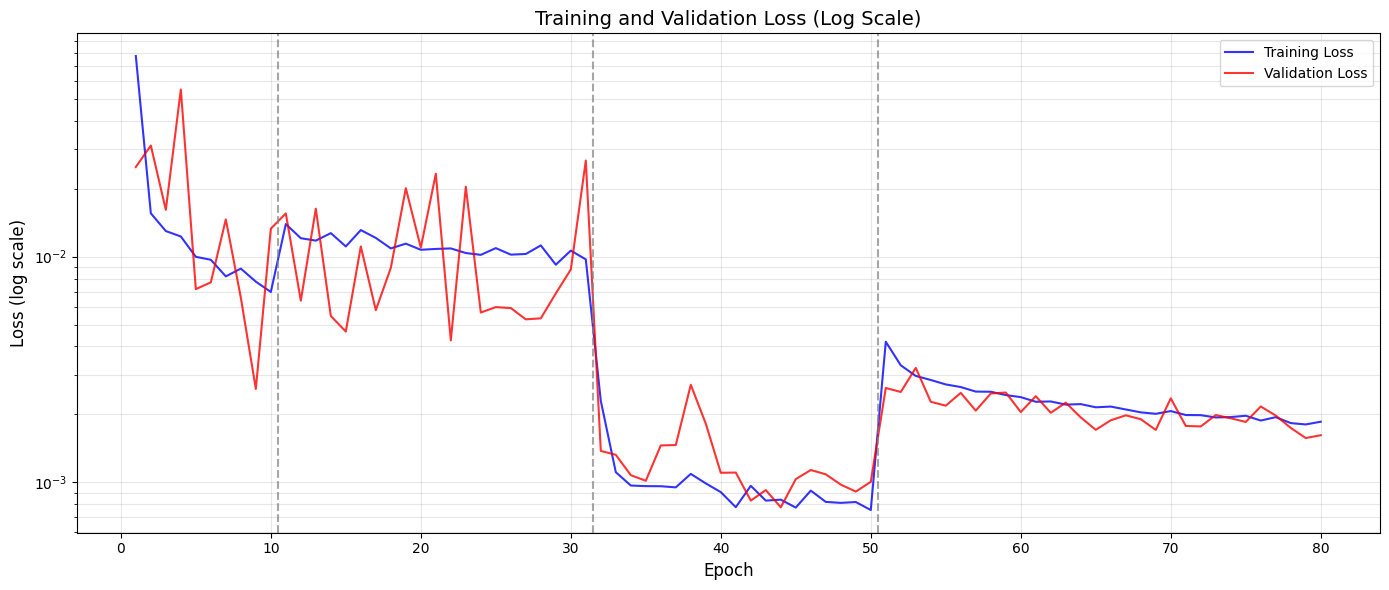

In [5]:
# Plot: Log scale for better visualization
plt.figure(figsize=(14, 6))

plt.semilogy(epochs, all_train, 'b-', label='Training Loss', linewidth=1.5, alpha=0.8)
plt.semilogy(epochs, all_val, 'r-', label='Validation Loss', linewidth=1.5, alpha=0.8)

# Add vertical lines for phase boundaries
plt.axvline(x=phase1_end + 0.5, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=phase2_end + 0.5, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=phase3_end + 0.5, color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (log scale)', fontsize=12)
plt.title('Training and Validation Loss (Log Scale)', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

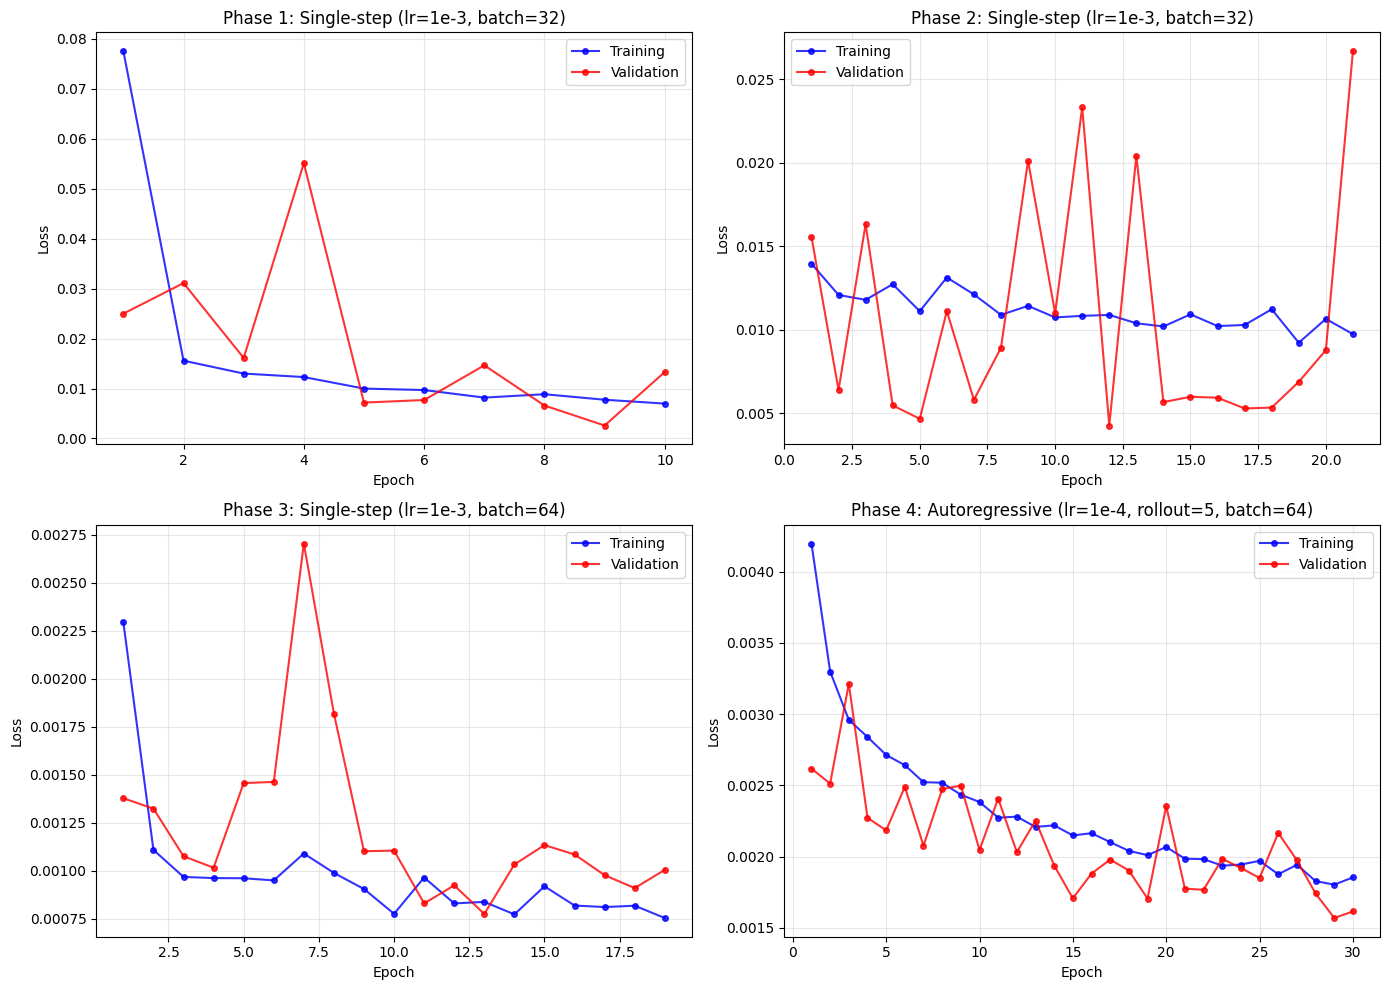

In [12]:
# Plot: Individual phases side by side
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

phases = [
    (part1_train, part1_val, 'Phase 1: Single-step (lr=1e-3, batch=32)'),
    (part2_train, part2_val, 'Phase 2: Single-step (lr=1e-3, batch=32)'),
    (part3_train, part3_val, 'Phase 3: Single-step (lr=1e-3, batch=64)'),
    (part4_train, part4_val, 'Phase 4: Autoregressive (lr=1e-4, rollout=5, batch=64)')
]

for ax, (train, val, title) in zip(axes.flat, phases):
    ep = list(range(1, len(train) + 1))
    ax.plot(ep, train, 'b-o', label='Training', markersize=4, alpha=0.8)
    ax.plot(ep, val, 'r-o', label='Validation', markersize=4, alpha=0.8)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics
print("=" * 50)
print("TRAINING SUMMARY")
print("=" * 50)

for i, (train, val, name) in enumerate([
    (part1_train, part1_val, 'Phase 1'),
    (part2_train, part2_val, 'Phase 2'),
    (part3_train, part3_val, 'Phase 3'),
    (part4_train, part4_val, 'Phase 4')
], 1):
    print(f"\n{name}:")
    print(f"  Epochs: {len(train)}")
    print(f"  Train Loss: {train[0]:.6f} -> {train[-1]:.6f} (min: {min(train):.6f})")
    print(f"  Val Loss:   {val[0]:.6f} -> {val[-1]:.6f} (min: {min(val):.6f})")

print(f"\n{'=' * 50}")
print(f"OVERALL:")
print(f"  Total Epochs: {len(all_train)}")
print(f"  Final Train Loss: {all_train[-1]:.6f}")
print(f"  Final Val Loss: {all_val[-1]:.6f}")
print(f"  Best Val Loss: {min(all_val):.6f} (Epoch {all_val.index(min(all_val)) + 1})")